- Task : Text Classification
- Model: BERT 
- Dataset: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/deep learning/data/spam.csv'
df = pd.read_csv(path,encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df['Unnamed: 2'].unique()

array([nan, ' PO Box 5249',
       ' the person is definitely special for u..... But if the person is so special',
       ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""',
       ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"',
       'this wont even start........ Datz confidence.."', 'GN',
       '.;-):-D"',
       'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""',
       ' bt not his girlfrnd... G o o d n i g h t . . .@"',
       ' I\'ll come up"',
       ' don\'t miss ur best life for anything... Gud nyt..."',
       ' just as a shop has to give a guarantee on what they sell. B. G."',
       ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"',
       ' the toughest is acting Happy with all unspoken pain inside..\\""',
       ' smoke hella weed\\""', '\\" not \\"what i need to do.\\""',
       'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD

In [6]:
df1 = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [7]:
col = ['lables','message']
df1.columns = col
df1.head()

,lables,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df1.isnull().sum().any()

False

In [9]:
df1.duplicated().sum() # 403
df1.shape

(5572, 2)

In [10]:
df1 = df1.drop_duplicates(keep='first')
df1.shape

(5169, 2)

In [11]:
print(f'The percentage of spam and ham message is:\n{(df1.lables.value_counts()/len(df1)*100).round(2)}')
df1.lables.value_counts()

The percentage of spam and ham message is:
ham     87.37
spam    12.63
Name: lables, dtype: float64


ham     4516
spam     653
Name: lables, dtype: int64

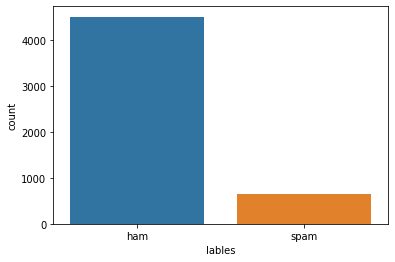

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df1['lables'])
plt.show()


In [13]:
df_spam = df1[df1['lables'] == 'spam']
df_ham = df1[df1['lables'] == 'ham']
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
print(f'the shape for spam data is: {df_spam.shape} and ham data after downsampling is: {df_ham_downsampled.shape}')
df_merged = pd.concat([df_ham_downsampled,df_spam],ignore_index=True)
df_merged.lables.value_counts()

the shape for spam data is: (653, 2) and ham data after downsampling is: (653, 2)


ham     653
spam    653
Name: lables, dtype: int64

In [14]:
df_merged.sample(4)

,lables,message
63,ham,"Sorry, I'll call later in meeting"
522,ham,Blank is Blank. But wat is blank? Lol
996,spam,we tried to contact you re your response to ou...
1253,spam,Jamster! To get your free wallpaper text HEART...


In [15]:
def text_to_bool(text):
  if text == 'spam':
    return 1
  else:
    return 0


In [16]:
df_merged['lables'] = df_merged['lables'].apply(lambda x : text_to_bool(x))

In [17]:
df_merged.sample(4)

,lables,message
1060,1,RCT' THNQ Adrian for U text. Rgds Vatian
627,0,Good afternoon sunshine! How dawns that day ? ...
392,0,Ffffffffff. Alright no way I can meet up with ...
968,1,YES! The only place in town to meet exciting a...


In [18]:
from sklearn.model_selection import train_test_split
X = df_merged['message']
y = df_merged['lables']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [19]:
X_train.head()

863    Thanks for the Vote. Now sing along with the s...
396            Did u see what I posted on your Facebook?
650                      I'll reach in ard 20 mins ok...
688    Text & meet someone sexy today. U can find a d...
824    Thank you, winner notified by sms. Good Luck! ...
Name: message, dtype: object

In [ ]:
!pip install -U tensorflow

In [ ]:
!pip install tensorflow-text

In [22]:

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text


In [23]:
preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")


In [24]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


In [43]:
X_train.shape

(875,)

In [51]:
def get_embedding_vector(text):
  # creates embedding vector for each messages
  preprocessed = bert_preprocess(text)
  embedded = bert_encoder(preprocessed)
  embedded_vector = embedded['pooled_output']
  return embedded_vector

In [62]:
text = ['fruit','phone']
get_embedding_vector(text)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.9386132 , -0.31700867, -0.47643077, ..., -0.29992422,
        -0.65563756,  0.9181067 ],
       [-0.8128214 , -0.16238627,  0.4042951 , ...,  0.40223044,
        -0.5468337 ,  0.8584108 ]], dtype=float32)>

In [69]:
from prompt_toolkit import output
# bert layers
inp = tf.keras.layers.Input(shape=(),dtype=tf.string)
preprocessed_text = bert_preprocess(inp)
bert_encoded_op = bert_encoder(preprocessed_text)
# neural netwrok layers
layer1 = tf.keras.layers.Dropout(.1)(bert_encoded_op['pooled_output'])
layer2 = tf.keras.layers.Dense(1,activation='sigmoid')(layer1)

# final model construction
model = tf.keras.Model(inputs=[inp],outputs=[layer2])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     {'input_type_ids':   0           ['input_5[0][0]']                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [73]:
metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
          tf.keras.metrics.Precision(name='precision'),
          tf.keras.metrics.Recall(name='recall')] 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=metrics)

In [74]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
28/28 [==============================] - 21s 347ms/step - loss: 0.6254 - accuracy: 0.6743 - precision: 0.6645 - recall: 0.7055
Epoch 2/20
28/28 [==============================] - 10s 357ms/step - loss: 0.5101 - accuracy: 0.8114 - precision: 0.8227 - recall: 0.7945
Epoch 3/20
28/28 [==============================] - 10s 346ms/step - loss: 0.4323 - accuracy: 0.8594 - precision: 0.8358 - recall: 0.8950
Epoch 4/20
28/28 [==============================] - 10s 352ms/step - loss: 0.4051 - accuracy: 0.8651 - precision: 0.8604 - recall: 0.8721
Epoch 5/20
28/28 [==============================] - 10s 355ms/step - loss: 0.3663 - accuracy: 0.8811 - precision: 0.8678 - recall: 0.8995
Epoch 6/20
28/28 [==============================] - 9s 327ms/step - loss: 0.3367 - accuracy: 0.9120 - precision: 0.9038 - recall: 0.9224
Epoch 7/20
28/28 [==============================] - 9s 328ms/step - loss: 0.3208 - accuracy: 0.9063 - precision: 0.9045 - recall: 0.9087
Epoch 8/20
28/28 [==================

In [97]:
model.evaluate(X_test,y_test)

14/14 [==============================] - 6s 326ms/step - loss: 0.2031 - accuracy: 0.9281 - precision: 0.9340 - recall: 0.9209


[0.20310832560062408,
 0.9280742406845093,
 0.9339622855186462,
 0.9209302067756653]

In [100]:
import numpy as np
def predict_model(data):
  pred = model.predict(data)
  pred_converted = np.where(pred > .5, 1, 0).flatten()
  return pred_converted

In [ ]:
prediction = predict_model(X_test)
prediction

In [90]:
y_test.values[:5],prediction[:5]

(array([0, 0, 1, 1, 0]), array([0, 0, 1, 1, 0]))

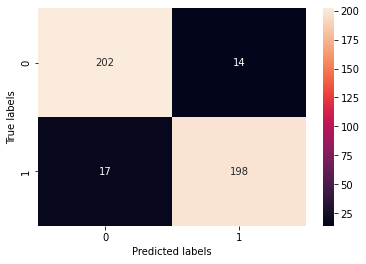

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [106]:

reviews = [
    'Reply to win Â£100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
p = predict_model(reviews)
print(p)
p_con = ['ham' if i == 0 else 'spam' for i in p]
p_con

1/1 [==============================] - 0s 84ms/step
[1 1 1 0 0]


['spam', 'spam', 'spam', 'ham', 'ham']

# Example

In [34]:
sent = ['I am good','oh feeling nice']
processed_text = bert_preprocess(sent)
processed_text.keys()

dict_keys(['input_type_ids', 'input_word_ids', 'input_mask'])

In [ ]:
processed_text['input_word_ids']

In [39]:
encoded_data = bert_encoder(processed_text)
encoded_data.keys()

dict_keys(['sequence_output', 'pooled_output', 'encoder_outputs', 'default'])

In [47]:
len(encoded_data['pooled_output'])
encoded_data['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8607541 , -0.26349407,  0.32263112, ...,  0.32830408,
        -0.54652697,  0.90258443],
       [-0.8762048 , -0.26585028, -0.29953024, ..., -0.11674481,
        -0.5717491 ,  0.8753406 ]], dtype=float32)>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([encoded_data(sent)[0]],[encoded_data(sent)[1]])